<h2>Clustering de Dados</h2>

Para determinar a qual grupo de riqueza pertence cada bairro, vamos utilizar algoritmos de clusterização para agrupá-los a partir de suas áreas, populações e rendimentos médios.

In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
#Lendo dados
df = pd.read_csv('dados_corrigidos.csv')\
        .drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

cols = ['area_hectare', 'populacao', 'rend_medio']

cdf = df[cols]

#Normalizando para clustering:
ncdf = (cdf - cdf.min()) / (cdf.max() - cdf.min())

ncdf.describe()

,area_hectare,populacao,rend_medio
count,94.000000,94.000000,94.000000
mean,0.183565,0.132532,0.217745
std,0.221753,0.149550,0.246901
min,0.000000,0.000000,0.000000
25%,0.042092,0.047814,0.055925
50%,0.085459,0.082414,0.127361
75%,0.220344,0.168053,0.243741
max,1.000000,1.000000,1.000000


Para achar um número interessante de clusters, utilizaremos clustering hierárquico.

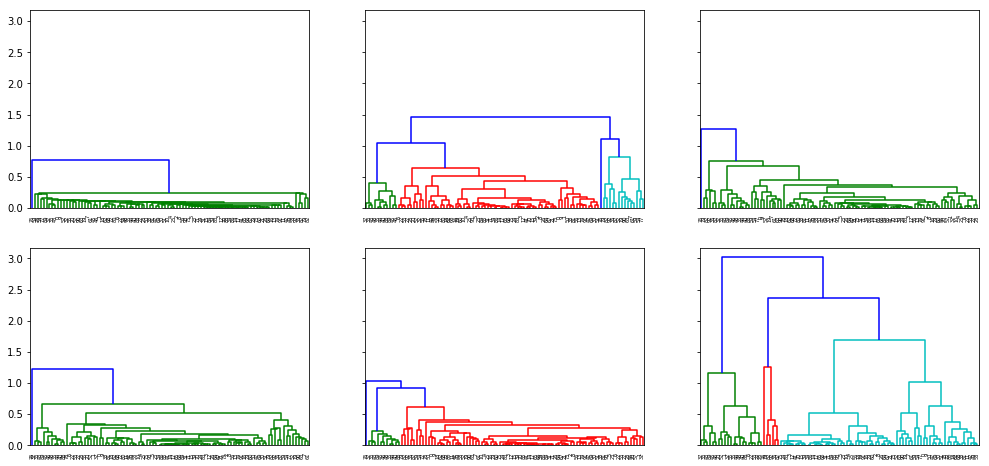

In [3]:
#Métodos de ligação
methods = ['single', 'complete', 'average', 'centroid', 'median', 'ward']

dist = pdist(ncdf)

cs = [linkage(dist, method = method) for method in methods]

fig, axes = plt.subplots(nrows = 2, ncols = 3, sharey = True, figsize = (17, 8))

for i, c in enumerate(cs):
    dendrogram(c, ax = axes[i // 3][i % 3])

A clusterização hierárquica utilizando o método de Ward mostra o resultado mais balanceado, com um corte na altura 1.5 dando 4 clusters, um bom número. Vamos observar como os bairros ficam divididos:

In [4]:
labels = cut_tree(cs[5], height = 1.5)

cbdf = cdf.copy()
cbdf['nome_bairro'] = df['nome_bairro']
cbdf['cluster'] = labels.flatten()

gcbdf = cbdf.groupby('cluster')

for col in cols:
    print(col, ':')
    display(gcbdf[col].describe())

area_hectare :


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,28.0,248.892857,109.034259,19.0,169.5,231.0,329.50,454.0
1,21.0,78.904762,54.146011,16.0,44.0,56.0,102.00,188.0
2,39.0,55.641026,24.854828,14.0,36.0,52.0,69.50,127.0
3,6.0,674.666667,83.514470,585.0,620.0,647.5,731.25,798.0


populacao :


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,28.0,28481.714286,18046.440944,602.0,17790.0,30459.5,34725.25,70453.0
1,21.0,8845.428571,8271.436711,72.0,2658.0,5917.0,14124.00,29180.0
2,39.0,8412.000000,4043.594258,285.0,6308.5,8480.0,10996.50,18334.0
3,6.0,37654.000000,44997.184107,2566.0,8852.0,22797.0,43678.00,122922.0


rend_medio :


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,28.0,1616.980714,550.576593,567.00,1181.8625,1550.57,2046.1425,2812.73
1,21.0,7153.118571,2354.858100,3618.45,5115.0600,7106.75,9040.7600,11339.79
2,39.0,1598.199231,751.772189,705.83,1049.0800,1296.05,2052.0900,3747.16
3,6.0,2662.498333,2235.829807,1159.26,1396.2950,2022.27,2362.2325,7108.00


Podemos caracterizar os clusters da seguinte forma:<br>
O cluster 0 contém bairros com área razoável, população grande e rendimento médio entre pequeno e razoável.<br>
O cluster 1 contém bairros com área pequena, população razoável e rendimento médio muito alto.<br>
O cluster 2 contém bairros com área pequena, população razoável e rendimento médio razoável.<br>
O cluster 3 contém bairros com área grande, população razóavel e rendimento médio alto.<br>

In [5]:
df['classe_socioeconomica'] = cbdf['cluster']

pd.DataFrame.to_csv(df, 'dados_clusterizados.csv')

df['classe_socioeconomica'].head(15)

0     0
1     1
2     2
3     2
4     2
5     2
6     1
7     0
8     2
9     0
10    2
11    0
12    2
13    2
14    2
Name: classe_socioeconomica, dtype: int64

In [9]:
for n in range(0, 4):
    print('Cluster', str(n) + ':')
    display(df[df['classe_socioeconomica'] == n]['nome_bairro'])

Cluster 0:


0         Bairro do Recife
7              Santo Amaro
9                 São José
11               Água Fria
18            Campo Grande
19             Dois Unidos
30                Apipucos
38               Macaxeira
42         Nova Descoberta
47        Sítio dos Pintos
49           Vasco da Gama
50                 Caxangá
51    Cidade Universitária
52                Cordeiro
54                Iputinga
58                 Torrões
59                  Várzea
61                Afogados
62                  Areias
63                   Barro
68        Jardim São Paulo
69                  Jiquiá
72              San Martin
77                   Cohab
78                   Ibura
80                   Ipsep
81                  Jordão
90              Passarinho
Name: nome_bairro, dtype: object

Cluster 1:


1          Boa Vista
6          Paissandu
20      Encruzilhada
22         Hipódromo
27         Rosarinho
28           Torreão
32      Casa Amarela
33        Casa Forte
35             Derby
37          Jaqueira
40          Monteiro
43        Parnamirim
44         Pau-Ferro
45    Poço da Panela
46           Santana
48       Tamarineira
53    Ilha do Retiro
55          Madalena
57             Torre
88        Espinheiro
89            Graças
Name: nome_bairro, dtype: object

Cluster 2:


2                  Cabanga
3                  Coelhos
4            Ilha do Leite
5       Ilha Joana Bezerra
8            Santo Antônio
10                Soledade
12    Alto Santa Terezinha
13                  Arruda
14                Beberibe
15      Bomba do Hemetério
16                Cajueiro
17      Campina do Barreto
21                  Fundão
23           Linha do Tiro
24               Peixinhos
25         Ponto de Parada
26        Porto da Madeira
29           Alto do Mandu
31      Brejo da Guabiraba
34     Córrego do Jenipapo
39              Mangabeira
41      Morro da Conceição
56                   Prado
60                   Zumbi
64                   Bongi
65                  Caçote
66               Coqueiral
67                Estância
70               Mangueira
71             Mustardinha
73                  Sancho
74                 Tejipió
75                    Totó
83                 Aflitos
84     Alto José Bonifácio
85      Alto José do Pinho
86       Brejo do Beberibe
9

Cluster 3:


36      Guabiraba
76     Boa Viagem
79    Imbiribeira
82           Pina
87    Dois Irmãos
92         Curado
Name: nome_bairro, dtype: object

Para verificarmos se existe uma diferença estatísticamente significativa entre os tempos de atendimentos dos bairros de diferentes clusters, devemos, para cada atendimento, marcar a que cluster pertence.